## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)
from scipy import stats
from scipy.stats import binom
import seaborn as sns


`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv(r"ab_data.csv")


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

#290584

290584

**There are 290584 unique users in the dataset**

d. The proportion of users converted.

In [5]:
#https://stackoverflow.com/questions/50558458/pandas-get-frequency-of-item-occurrences-in-a-column-as-percentage

df['converted'].value_counts(normalize=True) * 100

#12% converted

0    88.034081
1    11.965919
Name: converted, dtype: float64

**Approximately 12% of users converted**

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
#https://stackoverflow.com/questions/33271098/python-get-a-frequency-count-based-on-two-columns-variables-in-pandas-datafra
df.groupby(["group", "landing_page"]).size()

#1,928 + 1,965 = 3,893 times new_page and treatment don't match

group      landing_page
control    new_page          1928
           old_page        145274
treatment  new_page        145311
           old_page          1965
dtype: int64

**There are 3,893 times new_page and treatment don't match**

f. Do any of the rows have missing values?

In [7]:
#https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/
df.isnull().sum()



user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

<b> We can see from the 0's in each column that there are no null values. </b>

<b>f) The 0's show that there are no null/missing values in any of the columns </b>

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [9]:
#https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value

df_t_n = df[(df.group == 'treatment') & (df.landing_page == 'new_page')] 
df_c_o = df[(df.group == 'control') & (df.landing_page == 'old_page')]

In [10]:
#https://stackoverflow.com/questions/41181779/merging-2-dataframes-vertically

df2 = pd.concat([df_t_n, df_c_o], ignore_index=True)
df2.head()

,user_id,timestamp,group,landing_page,converted
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2['user_id'].nunique()


290584

<b>There are 290584 unique user ids in the dataframe df2</b>


b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
#https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/#:~:text=To%20find%20%26%20select%20the%20duplicate,argument%20is%20'first').
duplicate_user_id = df2[df2.duplicated(['user_id'])]
duplicate_user_id

,user_id,timestamp,group,landing_page,converted
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


<b>b. The repeated user_id is 773192 </b>

c. What is the row information for the repeat **user_id**? 

<b>The row information is contained in the variable - displayed below
 </b>

In [14]:
duplicate_user_id

,user_id,timestamp,group,landing_page,converted
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
df2 = df2.drop(1404)


In [16]:
#checking no more duplicates
duplicate_user_id2 = df2[df2.duplicated(['user_id'])]
duplicate_user_id2

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
#https://blog.softhints.com/pandas-count-percentage-value-column/
#https://www.youtube.com/watch?v=P5pxJkv71BU
converted = df.converted
counts = converted.value_counts()
percent = converted.value_counts(normalize=True)
percent100 = converted.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Counts': counts, 'Percent': percent, 'Percent as %': percent100})


,Counts,Percent,Percent as %
0,259241,0.880341,88.0%
1,35237,0.119659,12.0%


<b>The percentage of coverting(1 in this column) regardless of the page they receive is 12%(rounded to 1 decimal place) </b>

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
#https://discuss.analyticsvidhya.com/t/how-to-find-percentage-of-total-with-groupby-pandas/66092/2
pd.crosstab(df['group'],df['converted']).apply(lambda r: r/r.sum(), axis=1)


converted,0,1
group,,
control,0.879601,0.120399
treatment,0.881080,0.118920


<b> b. Given that an individual was in the 'control' group, the probability they converted is 12.04% (2 d.p)</b>

c. Given that an individual was in the `treatment` group, what is the probability they converted?

<b>c. Given that an individual was in the 'treatment' group, the probability they converted is 11.89% (2 d.p)</b>

d. What is the probability that an individual received the new page?

In [19]:
#https://blog.softhints.com/pandas-count-percentage-value-column/
#https://www.youtube.com/watch?v=P5pxJkv71BU
page = df.landing_page
counts = page.value_counts()
percent = page.value_counts(normalize=True)
percent100 = page.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Counts': counts, 'Percent': percent, 'Percent as %': percent100})


,Counts,Percent,Percent as %
new_page,147239,0.5,50.0%
old_page,147239,0.5,50.0%


<b>d. The probability they received the new page is 50% (rounded) </b>

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.**

From the results above from (a) to (d) I do not think there is any sufficient evidence that the new landing page leads to more conversions as in the treatment group with the new landing page, there is actually slightly less conversions suggesting very little or no difference between the two.

However we can explore further by looking at the timestamps for visits of the groups(and if we had the data - more information on the makeup of the Control Vs Treatment Group e.g. age, income, gender to see if they are truly similar or not) to see if there is difference taking this into account. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

<b>
1.
**$P_{new}$** is the Probability of the new page converting
**$P_{old}$**is the Probability of the old page converting
    
**$H_{O}$** (the Null hypothesis) is that the click-through-rate (CTR)/success of the **$u_{old}$** is the same as or greater than the **$u_{new}$**. Or **$u_{old}$** >= **$u_{new}$** 

**$H_{1}$** (the Alternative hypothesis) is that the click-through-rate (CTR)/success of the **$u_{old}$** is the less than the **$u_{new}$**. Or **$u_{old}$** < **$u_{new}$** 


Alpha will be 0.05 as it is a standard business/marketing problem, which is the recommended value
</b>

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [20]:
#This should equal the total converted rate for all of the conversion values as they are equal
#https://stackoverflow.com/questions/50558458/pandas-get-frequency-of-item-occurrences-in-a-column-as-percentage

df2['converted'].value_counts(normalize=True) * 100

#12% converted

0    88.040291
1    11.959709
Name: converted, dtype: float64

**Therefore 12% (rounded up)**


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

**Therefore also 12% (roudned) as they are equal under the null hypothesis**


c. What is $n_{new}$, the number of individuals in the treatment group?

In [21]:
#https://stackoverflow.com/questions/33271098/python-get-a-frequency-count-based-on-two-columns-variables-in-pandas-datafra
df2.groupby(["group"]).size()


group
control      145274
treatment    145310
dtype: int64

<b>Treatment is: 145310 </b>

d. What is $n_{old}$, the number of individuals in the control group?

<b>Control is: 145274</b>

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
# your code here
p_under_null = 11.959709/100
n_new = 145310 #the treatment group
n_old = 145274 #the control group


In [23]:
#https://cmdlinetips.com/2018/03/probability-distributions-in-python/ 
new_page_converted = binom.rvs(n=1,p=p_under_null,size=n_new)
new_page_converted

array([0, 0, 1, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
#https://cmdlinetips.com/2018/03/probability-distributions-in-python/

old_page_converted = binom.rvs(n=1,p=p_under_null,size=n_old)
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
new_page_converted.mean() - old_page_converted.mean()

-0.0011443454755967475

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [26]:

p_diffs = (binom.rvs(n=n_new, p=p_under_null, size=10000)/n_new) - (binom.rvs(n=n_old, p=p_under_null, size=10000)/n_old)

p_diffs

array([ 0.00162235,  0.00120234, -0.00137174, ...,  0.00146383,
        0.00038349, -0.00325092])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([   11.,   135.,   616.,  1825.,  2952.,  2753.,  1283.,   362.,
           59.,     4.]),
 array([-0.00453098, -0.00359081, -0.00265064, -0.00171047, -0.0007703 ,
         0.00016987,  0.00111004,  0.00205021,  0.00299038,  0.00393055,
         0.00487072]),
 <a list of 10 Patch objects>)

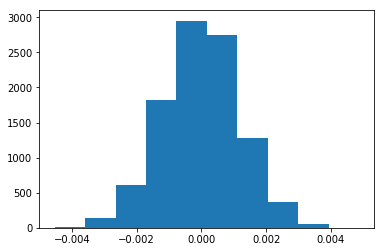

In [27]:
plt.hist(p_diffs)


<b> We can see the binomial dsitrition looks like it is normally distributed (with more results closd to 0, decreasing the further away from 0 each side)which is what we would expect.</b> An example of a normal distribution is below for context where we can see a similar shape:

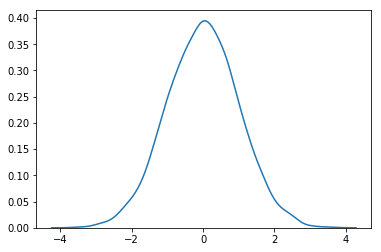

In [28]:
#Code taken from https://www.w3schools.com/python/numpy/numpy_random_normal.asp 
#To show normal distribution bell shape for comparison
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(random.normal(size=10000), hist=False)

plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
df_diff_t = df2[(df2.group == 'treatment')] 
df_diff_c = df2[(df2.group == 'control')]

In [30]:
diff = df_diff_t['converted'].mean() - df_diff_c['converted'].mean()
diff

-0.0015782389853555567

In [31]:
(diff < p_diffs).mean()

0.9052

<b>90.4% of values are greater than the actual observed difference in ab_data.csv</b>

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

<b> k. The value for 'j' I have computed is called the P-Value in scientific studies.

This p-value value is 'the probability of obtaining the observed difference (or a larger one) in the outcome measure of the sample, given that no difference exists between treatments in the population (the null-hypothesis is true).'
#from https://www.youtube.com/watch?v=ukcFrzt6cHk

As it is greater than 0.05 at 0.90(2.d.p), this means the chance of observing difference between the two given the null hypothesis is true is very likely so we should reject the alternative hypothesis - in this case that the new page is either the same or worse than the old page.

If it was less than 0.05 then we would recommend rejecting the null hypothesis.
</b>

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [32]:
import statsmodels.api as sm

n_new = 145310 #the treatment group
n_old = 145274 #the control group

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [33]:
convert_old_df = df2[(df2.group == 'control') & (df2.converted == 1)]
#https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe
convert_old = len(convert_old_df.index)
convert_old

17489

In [34]:
convert_new_df = df2[(df2.group == 'treatment') & (df2.converted == 1)]
#https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe
convert_new = len(convert_new_df.index)
convert_new


17264

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [35]:
#https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest

stat, pval = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
stat, pval

(-1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

<b>
The P-Value is very similar at 0.905 Vs previous 0.90 in j, so this agrees as it's far above 0.05 that we should reject the alternative hypothesis that the new landing page increases conversions.

The Z-Score tells you how many standard deviations you are away from the mean. 
A negative z-score reveals the score is below the mean average. So  if a z-score is equal to -1.3109241984234394, it is 1.3109241984234394 standard deviations below the mean. 
#https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_hypothesistest-means-proportions/bs704_hypothesistest-means-proportions3.html

The level of significance which is in this case is 0.05 dictates the critical value on the Z Table to reject the null hypothesis.It's a two-tailed test so if α =0.05 then the critical value is  -1.645, which is below the -1.3109241984234394 we got, and therefore we're unable to reject the null hypothesis, fitting with our previous results.

</b>

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

#https://careerfoundry.com/en/blog/data-analytics/what-is-logistic-regression/
'Logistic regression is used when your Y variable can take only two values, and if the data is linearly separable, it is more efficient to classify it into two seperate classes.' Therefore as the Y can only be 0/1 for Y/N for conversion, I will use Logistic Regression rather than Linear.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [36]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [37]:
#https://thispointer.com/python-pandas-how-to-add-new-columns-in-a-dataframe-using-or-dataframe-assign/
df2['Intercept'] = 1

#https://classroom.udacity.com/nanodegrees/nd002-ent/parts/c1c68285-cc2f-4c61-83a4-c586caf9fa0a/modules/a21cf670-bf35-4d94-98e2-0974d1a0fede/lessons/333a7778-60c4-4615-a119-38f7bbebb7a2/concepts/28777848-e025-4ffe-aea6-9c08d814512a
#using the get_dummies methdod shown in the Udacity class to turn the column into a categorical variable with 0 and 1
df2[['not_ab_page', 'ab_page']] = pd.get_dummies(df2['group'])

df2 = df2.drop(['not_ab_page'], axis=1)

df2

,user_id,timestamp,group,landing_page,converted,Intercept,ab_page
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1
5,929503,2017-01-18 05:37:11.527370,treatment,new_page,0,1,1
6,834487,2017-01-21 22:37:47.774891,treatment,new_page,0,1,1
7,803683,2017-01-09 06:05:16.222706,treatment,new_page,0,1,1
8,944475,2017-01-22 01:31:09.573836,treatment,new_page,0,1,1
9,718956,2017-01-22 11:45:11.327945,treatment,new_page,0,1,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [38]:
#https://classroom.udacity.com/nanodegrees/nd002-ent/parts/c1c68285-cc2f-4c61-83a4-c586caf9fa0a/modules/a21cf670-bf35-4d94-98e2-0974d1a0fede/lessons/333a7778-60c4-4615-a119-38f7bbebb7a2/concepts/28777848-e025-4ffe-aea6-9c08d814512a
import statsmodels.api as sm
logit_mod = sm.Logit(df2['converted'], df2[['Intercept', 'ab_page']])
results = logit_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [39]:
#https://stackoverflow.com/questions/49814258/statsmodel-attributeerror-module-scipy-stats-has-no-attribute-chisqprob
results.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-05-24 19:54 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

<b> 
The p-value associated with ab_page is 0.19(2.d.p) which differs from the value 0.904 found in Part 2. 
This is because the Part 2 p-value value tells us how likely it is to get the a result like we did, if the null hypothesis were true. Or more formally ''the probability of obtaining the observed difference (or a larger one) in the outcome measure of the sample, given that no difference exists between treatments in the population (the null-hypothesis is true).'
#from https://www.youtube.com/watch?v=ukcFrzt6cHk
    
    
While the P-value in Part 3 
    'The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis. In other words, a predictor that has a low p-value is likely to be a meaningful addition to your model because changes in the predictor's value are related to changes in the response variable.
Conversely, a larger (insignificant) p-value suggests that changes in the predictor are not associated with changes in the response.'
#from https://blog.minitab.com/en/adventures-in-statistics-2/how-to-interpret-regression-analysis-results-p-values-and-coefficients#:~:text=The%20p%2Dvalue%20for%20each,can%20reject%20the%20null%20hypothesis.&text=Typically%2C%20you%20use%20the%20coefficient,keep%20in%20the%20regression%20model.
So if it's less than 0.05 it's likely a significant affector of the Y value(in this case whether it converts or not), however again in this case it's above 0.05 suggesting we cannot reject the null hypothesis. The page landed on likely does not effect on the dependent variable 'converted' in a meaningful way.
    
The difference in result is therefore because they are measuring different things(so are worked out differently).

</b>

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

<b> 
There could be many other factors that affect whether a person converts or not. For example the type of user it's advertised to (e.g. their income, race, city/country, gender etc.) that could make a difference to whether someone does who can then be shown different pages based on the cookies they have. 
    
As well as factors such as what time they accessed the site and whether they were already loyal customers, as once these factors are taken into account, there may be more clear differences in how people react to the new page Vs the old one. 

And if the results are the same for the old vs new pages, they can give us more data to conduct A/B tests for our new alternative hypothesis's(that they affect conversion rates).

Adding to many variables increases the chance of irrelevant factors being added which increases the variance(for no good reason) making it less accurate. 

It also increases the chance of adding highly correlated columns and therefore Multicollinearity which increases the standard errors of the coefficients, so some variables are counted as statistically insignificant when they should be significant.

Also too many variables can cause Overfitting where the model fits our current data extremely well but the ability to find casual trends that help us predict how others will respond is decreased - as 'noise' from these insignifiant/irrelevant variables is put into the model.
</b>

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [40]:
df_countries = pd.read_csv(r"countries.csv")


In [41]:
#https://stackoverflow.com/questions/18792918/combine-two-pandas-data-frames-join-on-a-common-column


df_new = pd.merge(df2, df_countries, on='user_id', how='outer')
df_new.head()

,user_id,timestamp,group,landing_page,converted,Intercept,ab_page,country
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA


In [42]:

#https://classroom.udacity.com/nanodegrees/nd002-ent/parts/c1c68285-cc2f-4c61-83a4-c586caf9fa0a/modules/a21cf670-bf35-4d94-98e2-0974d1a0fede/lessons/333a7778-60c4-4615-a119-38f7bbebb7a2/concepts/28777848-e025-4ffe-aea6-9c08d814512a
#using the get_dummies methdod shown in the Udacity class to turn the column into a categorical variable with 0 and 1
df_new[['US', 'CA', 'UK']] = pd.get_dummies(df_new['country'])


df_new.head()

,user_id,timestamp,group,landing_page,converted,Intercept,ab_page,country,US,CA,UK
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0,0
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,1,0
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,1,0,0


In [43]:
#https://discuss.analyticsvidhya.com/t/how-to-find-percentage-of-total-with-groupby-pandas/66092/2

pd.crosstab(df_new['converted'],df_new['US']).apply(lambda r: r/r.sum(), axis=1)




US,0,1
converted,,
0,0.949861,0.050139
1,0.951889,0.048111


<b>We can see above that almost all of the values in one of the predictor categories(US) are associated with only one of the binary outcome values(1) so a solution cannot be found for the predictor coefficient. therefore we will remove the 'US' column from our Logistic Regression Model.
#https://stackoverflow.com/questions/53041669/error-perfectseparationerror-perfect-separation-detected-results-not-availab </b>

In [44]:
import statsmodels.api as sm
logit_mod = sm.Logit(df_new['converted'], df_new[['Intercept', 'CA', 'UK']])
results1 = logit_mod.fit()
##https://stackoverflow.com/questions/49814258/statsmodel-attributeerror-module-scipy-stats-has-no-attribute-chisqprob

results1.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-05-24 19:54 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
CA             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
UK             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
==================================================================

"""

<b>We can see that the P-value is greater than 0.05 for both countries suggesting that both of these countries did not have a significant impact on conversion.</b>

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [52]:
#Based off Reviewers hint:joined_data['UK_ind_ab_page'] = joined_data['UK_ind']*joined_data['ab_page']
df_new['UK_ab_page'] = df_new['UK'] * df_new['ab_page']
df_new['CA_ab_page'] = df_new['CA'] * df_new['ab_page']
df_new['US_ab_page'] = df_new['US'] * df_new['ab_page']


In [53]:
df_new.head(3)

,user_id,timestamp,group,landing_page,converted,Intercept,ab_page,country,US,CA,UK,UK_ab_page,CA_ab_page,US_ab_page
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,1,0,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,1,0,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0,0,0,0,1


In [54]:
logit_mod2 = sm.Logit(df_new['converted'], df_new[['Intercept', 'CA', 'UK', 'ab_page', 'UK_ab_page', 'CA_ab_page']])
results2 = logit_mod2.fit()
##https://stackoverflow.com/questions/49814258/statsmodel-attributeerror-module-scipy-stats-has-no-attribute-chisqprob

results2.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-05-24 20:04 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
CA             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
UK             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
UK_ab_page     0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
CA_ab_page     0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
==================================================================

"""

<b>We can see that the P-value for ab_page is also above 0.05 for the both page and country columns suggesting this does not affect the conversion rates in any meaningful way/we fail to reject the null hypothesis.
</b> 

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [55]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0